In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
data = pd.read_csv('/Users/lofang/Desktop/VS code/bankruptcy.csv')

In [19]:
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

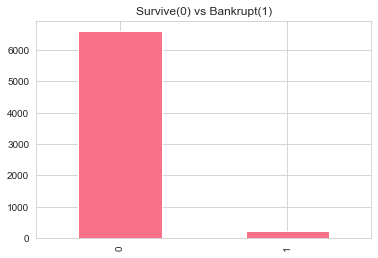

In [21]:
data['Bankrupt?'].value_counts().plot(kind='bar')
sns.set_style('whitegrid')
sns.set_palette('bwr')
plt.title('Survive(0) vs Bankrupt(1)')
plt.show()

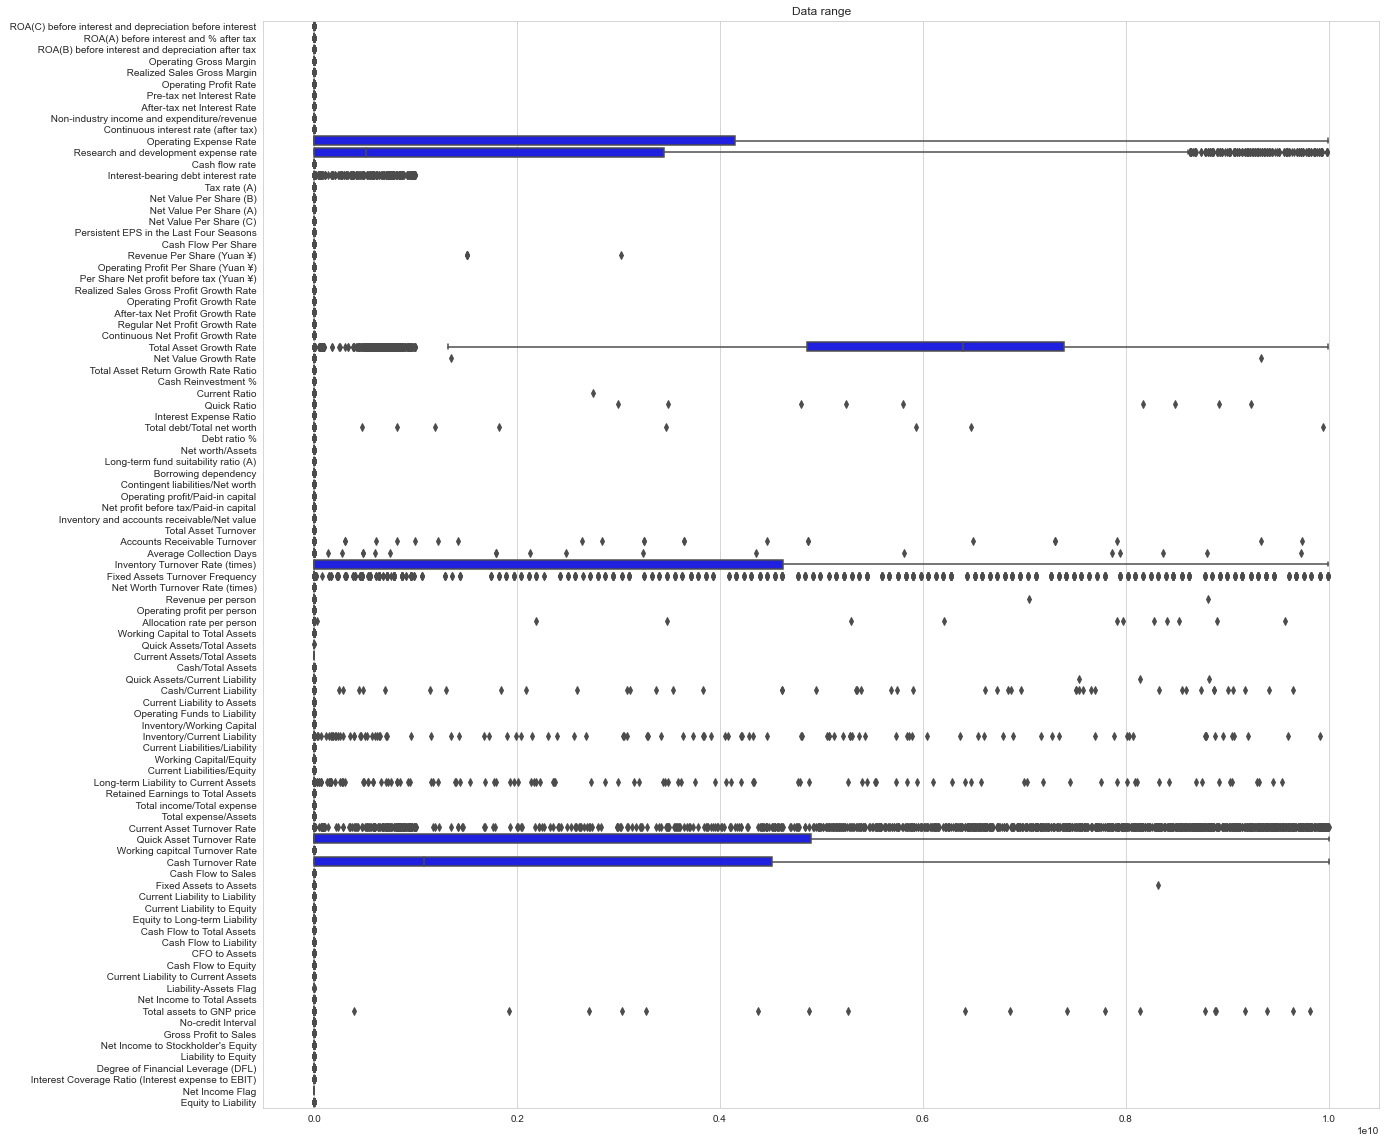

In [22]:
plt.figure(figsize=(20,20))
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.boxplot(data = data.drop(['Bankrupt?'], axis=1), orient='h', color='blue')
plt.title('Data range')
plt.show()

In [23]:
y=data['Bankrupt?']
x=data.drop(['Bankrupt?'], axis=1)

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [25]:
y_resampled.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.25,stratify=y_resampled,random_state=15)
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [27]:
print(y_train.value_counts())
print(y_test.value_counts())

0    165
1    165
Name: Bankrupt?, dtype: int64
0    55
1    55
Name: Bankrupt?, dtype: int64


In [28]:
print("Making predictions for the following 5 companies:")
print(x_test.head())
print("The predictions are")
print(forest_model.predict(x_test.head()))

Making predictions for the following 5 companies:
      ROA(C) before interest and depreciation before interest  \
348                                           0.470482          
10                                            0.552235          
341                                           0.417491          
246                                           0.438112          
19                                            0.495637          

      ROA(A) before interest and % after tax  \
348                                 0.531127   
10                                  0.581880   
341                                 0.477976   
246                                 0.495911   
19                                  0.552606   

      ROA(B) before interest and depreciation after tax  \
348                                           0.523529    
10                                            0.602548    
341                                           0.462070    
246                               

In [29]:
print("training score: ",forest_model.score(x_train,y_train))
print("testing score: ",forest_model.score(x_test,y_test))

training score:  1.0
testing score:  0.9


In [30]:
from sklearn.metrics import mean_absolute_error

predicted_bankruptcy = forest_model.predict(x)
mean_absolute_error(y, predicted_bankruptcy)

0.13594368675758908

In [31]:
data['predicted bankruptcy']=predicted_bankruptcy
data

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

In [32]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y, predicted_bankruptcy)
print(cf_matrix)

[[5676  923]
 [   4  216]]


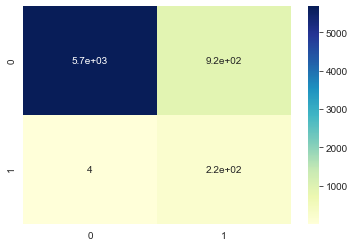

In [33]:
sns.heatmap(cf_matrix, annot=True,cmap='YlGnBu')
plt.show()

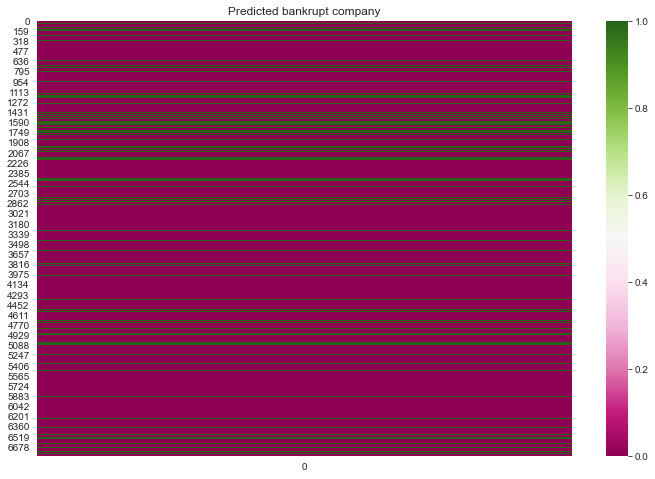

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(predicted_bankruptcy.reshape(6819, 1),cmap="PiYG")#reshape 將維度轉為二維
plt.title('Predicted bankrupt company')
plt.show()

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
data2 = pd.read_csv('/Users/lofang/Desktop/VS code/WHO COVID-19 global table data June 22nd 2021 at 10.52.14 PM.csv')

In [2]:
data2.head()

Name       WHO Region  Cases - cumulative total  \
0                    Global           Global                 178503429   
1  United States of America         Americas                  33190195   
2                     India  South-East Asia                  29977861   
3                    Brazil         Americas                  17927928   
4                    France           Europe                   5650315   

   Cases - cumulative total per 100000 population  \
0                                     2290.108471   
1                                    10027.170000   
2                                     2172.300000   
3                                     8434.310000   
4                                     8687.530000   

   Cases - newly reported in last 7 days  \
0                                2504100   
1                                  49697   
2                                 406980   
3                                 515162   
4                                  14066   

   Cases - newly reported in last 7 days per 100000 population  \
0                                          32.126333             
1                                          15.010000             
2                                          29.490000             
3                                         242.360000             
4                                          21.630000             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                   281610                    3872457   
1                                        0                     596003   
2                                    42640                     389302   
3                                    44178                     501825   
4                                      290                     109879   

   Deaths - cumulative total per 100000 population  \
0                                        49.681659   
1                                       180.060000   
2                                        28.210000   
3                                       236.090000   
4                                       168.940000   

   Deaths - newly reported in last 7 days  \
0                                   60068   
1                                    1359   
2                                   12271   
3                                   14424   
4                                     307   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                           0.770642              
1                                           0.410000              
2                                           0.890000              
3                                           6.790000              
4                                           0.470000              

   Deaths - newly reported in last 24 hours Transmission Classification  
0                                      6349                         NaN  
1                                         0      Community transmission  
2                                      1167           Clusters of cases  
3                                      1025      Community transmission  
4                                        39      Community transmission

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          238 non-null    object 
 1   WHO Region                                                    238 non-null    object 
 2   Cases - cumulative total                                      238 non-null    int64  
 3   Cases - cumulative total per 100000 population                237 non-null    float64
 4   Cases - newly reported in last 7 days                         238 non-null    int64  
 5   Cases - newly reported in last 7 days per 100000 population   237 non-null    float64
 6   Cases - newly reported in last 24 hours                       238 non-null    int64  
 7   Deaths - cumulative total                                     238 non-n

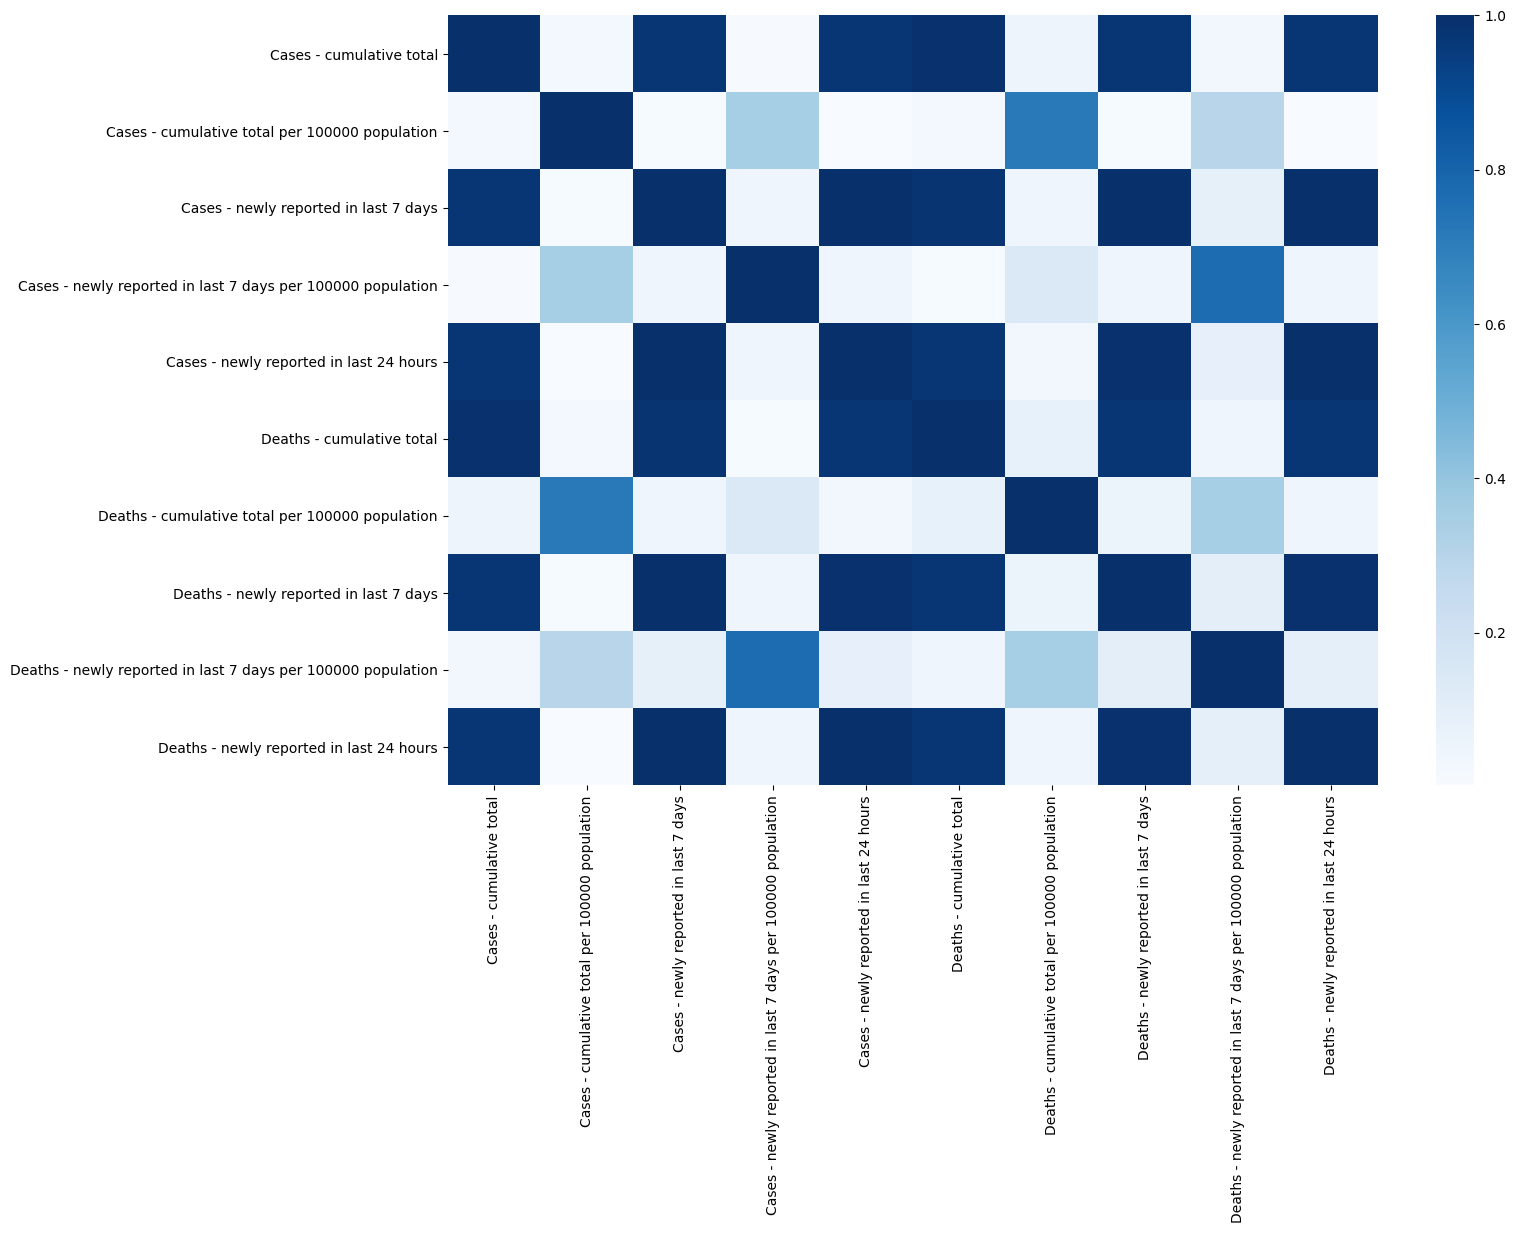

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr(),cmap='Blues')
plt.show()

In [4]:
y=data2['Cases - cumulative total']
x_feature = ['Cases - newly reported in last 7 days','Cases - newly reported in last 24 hours']
x=data2[x_feature]
print(x.shape)
print(y.shape)

(238, 2)
(238,)


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
covid_model=RandomForestRegressor(random_state=0)
covid_model.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [107]:
print("Making predictions for the following 10 countries:")
print(x_test.head(10))
print("The predictions are")
print(covid_model.predict(x_test.head(10)))

Making predictions for the following 10 countries:
     Cases - newly reported in last 7 days  \
178                                     22   
153                                     23   
106                                    463   
111                                   6347   
125                                   1896   
225                                      0   
122                                    350   
214                                      6   
45                                    5785   
194                                     91   

     Cases - newly reported in last 24 hours  
178                                        0  
153                                       10  
106                                       67  
111                                     2572  
125                                      106  
225                                        0  
122                                       46  
214                                        0  
45                 

In [108]:
from sklearn.metrics import mean_absolute_error

predicted_cases = covid_model.predict(x)
mean_absolute_error(y, predicted_cases)

515728.3967850241

In [110]:
from sklearn.naive_bayes import GaussianNB
covid3_model=GaussianNB()
covid3_model.fit(x_train,y_train)

GaussianNB()

In [111]:
print("Making predictions for the following 10 countries:")
print(x_test.head(10))
print("The predictions are")
print(covid3_model.predict(x_test.head(10)))

Making predictions for the following 10 countries:
     Cases - newly reported in last 7 days  \
178                                     22   
153                                     23   
106                                    463   
111                                   6347   
125                                   1896   
225                                      0   
122                                    350   
214                                      6   
45                                    5785   
194                                     91   

     Cases - newly reported in last 24 hours  
178                                        0  
153                                       10  
106                                       67  
111                                     2572  
125                                      106  
225                                        0  
122                                       46  
214                                        0  
45                 

In [112]:
print("bayes:",covid3_model.score(x_test,y_test))
print("random forest:",covid_model.score(x_test,y_test))


bayes: 0.016666666666666666
random forest: 0.3671459247274328


In [114]:
data2['predicted cases']=covid_model.predict(x)
data2.head()

Name       WHO Region  Cases - cumulative total  \
0                    Global           Global                 178503429   
1  United States of America         Americas                  33190195   
2                     India  South-East Asia                  29977861   
3                    Brazil         Americas                  17927928   
4                    France           Europe                   5650315   

   Cases - cumulative total per 100000 population  \
0                                     2290.108471   
1                                    10027.170000   
2                                     2172.300000   
3                                     8434.310000   
4                                     8687.530000   

   Cases - newly reported in last 7 days  \
0                                2504100   
1                                  49697   
2                                 406980   
3                                 515162   
4                                  14066   

   Cases - newly reported in last 7 days per 100000 population  \
0                                          32.126333             
1                                          15.010000             
2                                          29.490000             
3                                         242.360000             
4                                          21.630000             

   Cases - newly reported in last 24 hours  Deaths - cumulative total  \
0                                   281610                    3872457   
1                                        0                     596003   
2                                    42640                     389302   
3                                    44178                     501825   
4                                      290                     109879   

   Deaths - cumulative total per 100000 population  \
0                                        49.681659   
1                                       180.060000   
2                                        28.210000   
3                                       236.090000   
4                                       168.940000   

   Deaths - newly reported in last 7 days  \
0                                   60068   
1                                    1359   
2                                   12271   
3                                   14424   
4                                     307   

   Deaths - newly reported in last 7 days per 100000 population  \
0                                           0.770642              
1                                           0.410000              
2                                           0.890000              
3                                           6.790000              
4                                           0.470000              

   Deaths - newly reported in last 24 hours Transmission Classification  \
0                                      6349                         NaN   
1                                         0      Community transmission   
2                                      1167           Clusters of cases   
3                                      1025      Community transmission   
4                                        39      Community transmission   

   predicted cases  
0     1.248331e+08  
1     2.486248e+07  
2     2.519014e+07  
3     2.012917e+07  
4     4.730443e+06

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


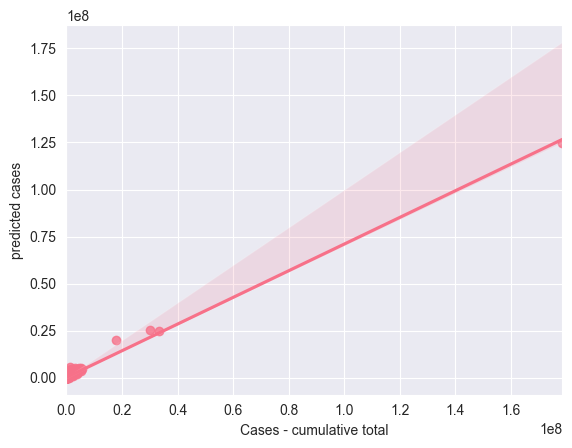

In [115]:
sns.set_style('darkgrid')
sns.regplot(data2['Cases - cumulative total'],data2['predicted cases'])
plt.show()

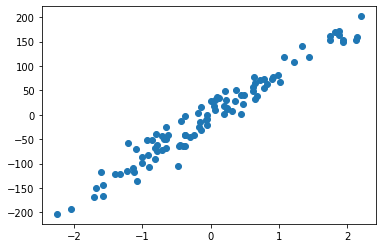

In [8]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
x,y=make_regression(n_samples=100,n_features=1,noise=20)
plt.scatter(x,y)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
regr=linear_model.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression()

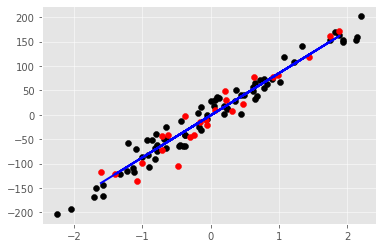

In [14]:
plt.scatter(x_train,y_train,color='black')
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,regr.predict(x_test),color='blue')
plt.style.use('ggplot')
plt.show()

In [18]:
regr.score(x_train,y_train)

0.9326411935429202

In [17]:
regr.score(x_test,y_test)

0.9326411935429202